## PREPARACION DEL DATASET

In [ ]:
#Empecemos importando las librerias y el dataset a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from google.colab import drive
drive.mount('/content/drive')

prueba = pd.read_csv('/content/drive/MyDrive/coderhouse/Proyecto final/NBA_2.csv', sep = ";", encoding='latin-1')

Mounted at /content/drive


Para alimentar nuestros algoritmo, hemos seleccionado un dataset con estadísticas de cada uno de los jugadores que pasaron por la NBA desde la temporada 2012-2013 hasta la actualidad. Esta elección se dio ya que durante los últimos 10 años el estilo de juego de la liga permanece constante.

In [ ]:
prueba = prueba.set_index('Rk')

In [ ]:
prueba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Quincy Acy,PF,22,TOR,29,0,342,42,75,0.560,...,0.816,30,47,77,11,13,15,17,53,116
2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,0.429,...,0.650,68,128,196,36,18,27,32,80,209
3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,0.439,...,0.857,29,210,239,206,40,11,138,137,1057
4,Josh Akognon,PG,26,DAL,3,0,9,2,4,0.500,...,0.000,0,1,1,1,0,0,0,3,5
5,Cole Aldrich,C,24,TOT,45,0,388,44,80,0.550,...,0.600,30,90,120,9,5,23,23,60,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6544,Thaddeus Young,PF,33,TOR,26,0,475,67,144,0.465,...,0.481,40,75,115,45,31,11,22,43,164
6545,Trae Young,PG,23,ATL,76,76,2652,711,1544,0.460,...,0.904,50,234,284,737,72,7,303,128,2155
6546,Omer Yurtseven,C,23,MIA,56,12,706,130,247,0.526,...,0.623,85,209,294,49,17,20,41,84,299


In [ ]:
prueba.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

**Diccionario de conceptos:** 

* 'Rk': Ranking arbitrario de ordenamiento 
* 'Player': Nombre y apellido del jugador 
* 'Pos': posición 
* 'Age': edad
* 'Tm': equipo
* 'G': partidos jugados
* 'GS': partidos jugados empezando como titular
* 'MP': minutos jugados
* 'FG': tiros de campo acertados
* 'FGA': tiros de campo intentados
* 'FG%': porcentaje de acierto en tiros de campo
* '3P': tiros de 3 acertados
* '3PA': tiros de 3 intentados
* '3P%': porcentaje de acierto en tiros de 3
* '2P': tiros de 2 acertados
* '2PA': tiros de 2 intentados
* '2P%': porcentaje de acierto en tiros de 2
* 'eFG%': porcentaje de efectividad real en tiros de campo
* 'FT': tiros libres acertados
* 'FTA': tiros libres intentados
* 'FT%': porcentaje de aciertos en tiros libres
* 'ORB': rebotes ofensivos obtenidos
* 'DRB': rebotes defensivos obtenidos
* 'TRB': rebotes totales obtenidos
* 'AST': asistencias generadas
* 'STL': robos generados
* 'BLK': bloqueos generados
* 'TOV': pérdidas de balón generadas
* 'PF': faltas personales generadas
* 'PTS': puntos generados

In [ ]:
prueba['Player'].groupby([prueba['Pos']]).count().round(1)

Pos
C           1198
C-PF           6
PF          1329
PF-C          11
PF-SF         11
PG          1270
PG-SG         10
SF          1193
SF-C           1
SF-PF          9
SF-SG         14
SG          1467
SG-PF          1
SG-PG         15
SG-PG-SF       1
SG-SF         12
Name: Player, dtype: int64

In [ ]:
# se asignan posiciones únicas a aquellos con posición múltiple, considerando la primera como su posición real

prueba = prueba.replace ("C-PF","C")
prueba = prueba.replace("PF-SF","PF")
prueba = prueba.replace("PG-SG","PG")
prueba = prueba.replace("SF-SG","SF")
prueba = prueba.replace("SG-PG","SG")
prueba = prueba.replace("SG-SF","SG")
prueba = prueba.replace("PF-C","PF")
prueba = prueba.replace("SF-C","SF")
prueba = prueba.replace("SF-PF","SF")
prueba = prueba.replace("SG-PG-SF","SG")
prueba = prueba.replace("SG-PF","SG")


prueba['Player'].groupby([prueba['Pos']]).count().round(1)


Pos
C     1204
PF    1351
PG    1280
SF    1217
SG    1496
Name: Player, dtype: int64

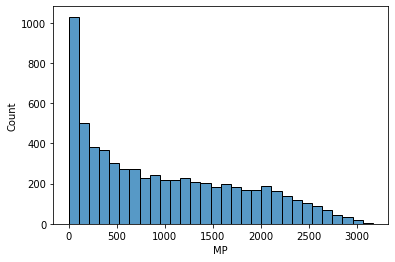

In [ ]:
sns.histplot(prueba['MP'] , bins=30)

## DATA WRANGLING

In [ ]:
# vamos a excluir a jugadores con menos 820 minutos jugados (10 minutos por partido durante toda la temporada de 82 juegos).
# al mismo tiempo vamos a normalizar las estadísticas en función de cada 36 minutos, tal como lo hace la NBA en sus análisis.

df = prueba[prueba.MP >= 820]  

def norm_36(num):
  return num*36/df['MP']

df[['FG', 'FGA','3P', '3PA', '2P', '2PA', 'FT', 'FTA','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']] = df[['FG', 'FGA','3P', '3PA', '2P', '2PA', 'FT', 'FTA','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(norm_36)
df = df.round({'FG':2, 'FGA':2, 'FG%':2,'3P':2, '3PA':2, '3P%':2, '2P':2, '2PA':2, '2P%':2, 'eFG%':2, 'FT':2, 'FTA':2, 'FT%':2,'ORB':2, 'DRB':2, 'TRB':2, 'AST':2, 'STL':2, 'BLK':2, 'TOV':2, 'PF':2, 'PTS':2})

df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
3,Arron Afflalo,SF,27,ORL,64,64,2307,6.20,14.12,0.44,...,0.86,0.45,3.28,3.73,3.21,0.62,0.17,2.15,2.14,16.49
8,LaMarcus Aldridge,PF,27,POR,74,74,2790,8.23,17.01,0.48,...,0.81,2.26,6.39,8.65,2.48,0.80,1.17,1.85,2.41,20.13
9,Lavoy Allen,C,23,PHI,79,37,1669,4.44,9.79,0.45,...,0.72,3.43,5.09,8.52,1.57,0.52,1.19,1.19,3.88,9.81
10,Ray Allen*,SG,37,MIA,79,0,2035,5.17,11.52,0.45,...,0.89,0.71,3.13,3.84,2.39,1.19,0.27,1.82,2.28,15.27
11,Tony Allen,SG,31,MEM,79,79,2109,4.85,10.89,0.44,...,0.72,2.07,4.13,6.20,1.67,2.03,0.75,1.60,3.60,12.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6534,Christian Wood,C,26,HOU,68,67,2094,7.56,15.09,0.50,...,0.62,1.89,9.90,11.79,2.66,0.93,1.12,2.17,2.94,20.94
6536,Delon Wright,SG,29,ATL,77,8,1452,3.02,6.67,0.45,...,0.86,1.24,4.21,5.45,4.66,2.31,0.47,1.12,1.39,8.48
6542,Thaddeus Young,PF,33,TOT,52,1,845,6.01,11.59,0.52,...,0.47,3.41,5.45,8.86,4.43,2.30,0.77,2.22,3.45,13.72


Con este filtro se mejora la calidad de los datos, evitando por ejemplo casos de jugadores con 1 minuto jugado y 2 puntos metidos que en la estadística de puntos cada 36 minutos daría un total de 72 puntos, información que no es real.

In [ ]:
#VEMOS AHORA QUE PORCENTAJEDE LOS DATOS NOS QUEDARON SOBRE EL DATASET ORIGINAL
df['Player'].count()/prueba['Player'].count()*100

49.54184483811851

In [ ]:
df.loc[:, 'Pos'].value_counts()

SG    740
PF    673
PG    663
SF    595
C     573
Name: Pos, dtype: int64

In [ ]:
#obtenemos tendencias medias del dataset limpio 
df2 = df.groupby('Pos').mean()
df2.T.round(2)

Pos,C,PF,PG,SF,SG
Age,26.50,26.92,26.69,26.44,26.55
G,66.28,65.15,63.44,65.69,64.97
GS,40.99,36.28,36.19,38.79,34.00
MP,1596.05,1634.91,1693.11,1724.62,1709.49
FG,6.20,5.82,5.85,5.28,5.77
FGA,11.65,12.42,13.51,11.97,13.39
FG%,0.54,0.47,0.43,0.44,0.43
3P,0.45,1.27,1.71,1.72,2.11
3PA,1.32,3.60,4.80,4.79,5.79
3P%,0.19,0.30,0.34,0.35,0.36


De la tabla obtenida podemos extraer información útil. 

En cuanto a puntos (PTS) no se observa una diferencia importante entre posiciones, siendo los PG los que más anotan y el resto de las posiciones se encuentran en un rango de valores similar.

Las estadísticas que ayudan al análisis son los rebotes y las asistencias. En cuanto a rebotes (TRB) los C destacan sobre el resto, seguido de los PF, indicando que aprovechando su físico en altura y contextura tienen tendencia a obtener más rebotes. Mientras que en cuanto a asistencias (AST) lideran los PG por amplia diferencia sobre el resto, entendiendo que son aquellos jugadores más habilidosos con el balón.

Esto ayuda para definir los features que podrían determinar la posición de cada jugador.

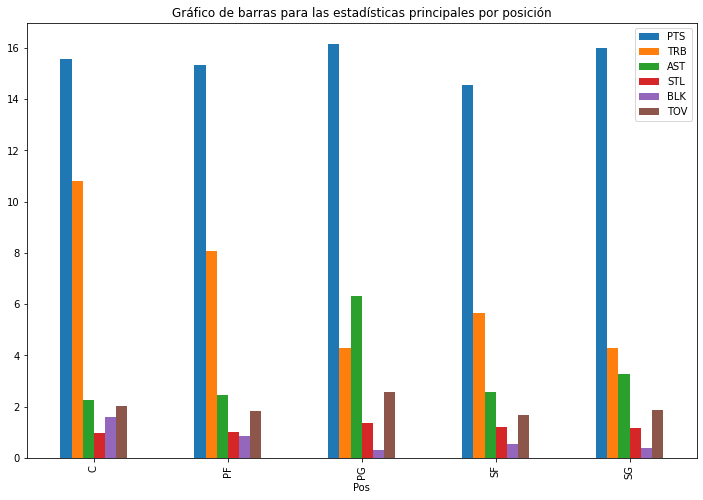

In [ ]:
#analizamos mediante un gráfico de barras las estadísiticas principales por posición

barras_df = df2[['PTS', 'TRB', 'AST', 'STL', 'BLK','TOV']]  # SUME TOV PORQUE NOS PUEDE SERVIR PARA DIFERENCIAR A LOS PG JUNTO A LAS ASISTENCIAS
barras_df.plot(kind='bar', figsize = (12, 8), title='Gráfico de barras para las estadísticas principales por posición')

Con este gráfico de barras podemos respaldar de forma gráfica las tendencias mencionadas anteriormente para definir los features por posición. Otro dato que caracteriza a los C y PF por encima del resto son los bloqueos cada 36 minutos (BLK).

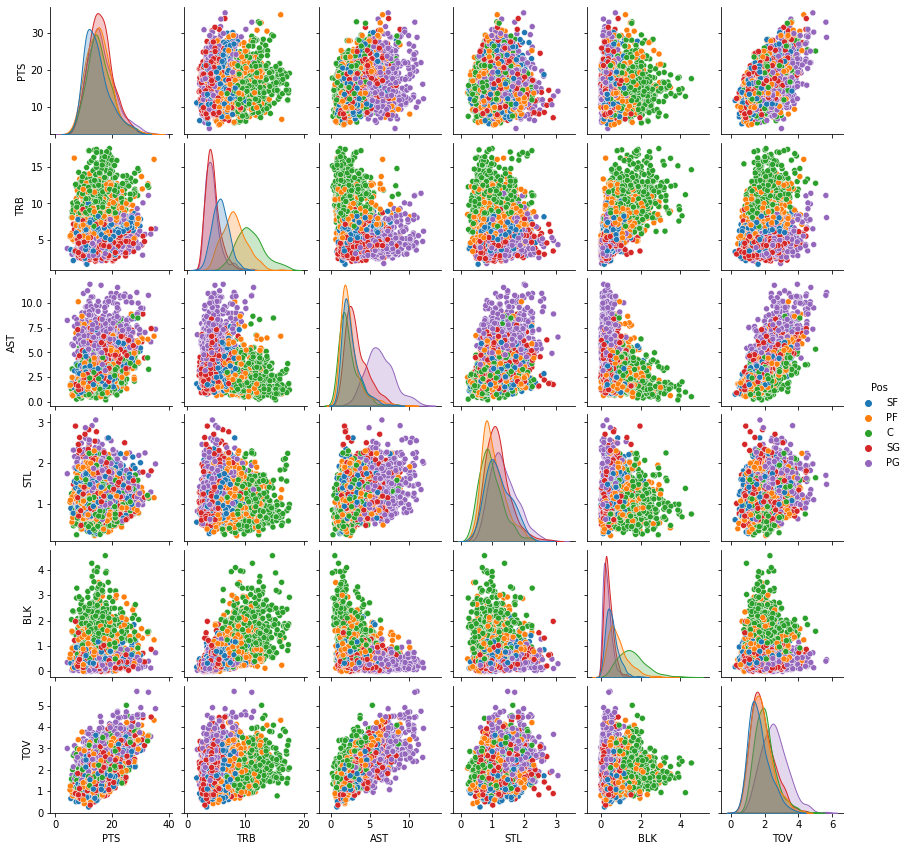

In [ ]:
# analizamos mediante un pairplot la relación entre las distintas estadísticas principales normalizadas

sns_df = df[['PTS', 'TRB', 'AST', 'STL', 'BLK' , 'TOV', 'Pos']]
sns_df = sns_df.reset_index()
sns_df = sns_df.drop('Rk', axis=1)
sns_plot = sns.pairplot(sns_df, hue='Pos', height=2)
sns_plot

A la hora de comparar las variables vemos que en su mayoría de las combinaciones a medida que los valores de x incrementan, los de y también lo hacen. Esto encuentra su lógica en que si un jugador es bueno en un tipo de estadística, existen las chances de que sea bueno en las demás.

Nos interesa analizar los casos especiales mencionados anteriormente:


*   **TRB vs AST**: en este caso ocurre el opuesto a la tendencia general. Salvo excepciones, cuando un jugador tiene más asistencias o rebotes, tiene menos de la otra estadística.
* **BLK vs AST**: en este caso ocurre al igual que en el caso anteriormente mencionado.

De esta manera se puede confirmar la polarización antes mencionada entre los PG y los C. Aquellos más generadores de juego tienen menos tendencia al juego físico de bloqueos y rebotes. 







## PAIRPLOTS DE LAS PRINCIPALES ESTADÍSTICAS POR POSICION

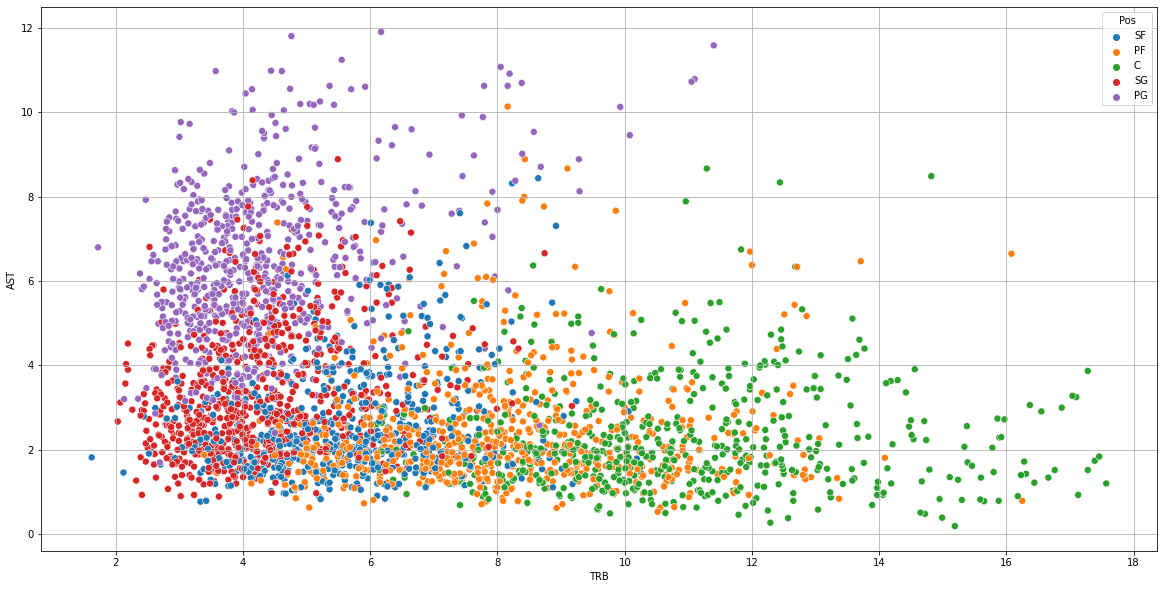

In [ ]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="TRB", y="AST", data=df, hue="Pos" , s=50)
plt.grid()

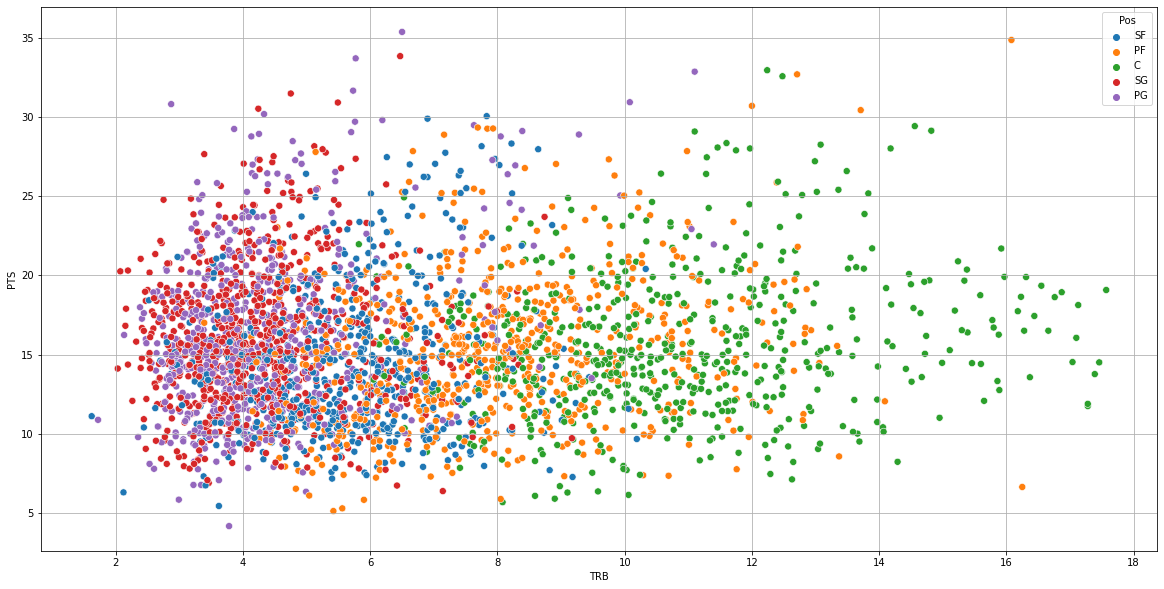

In [ ]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="TRB", y="PTS", data=df, hue="Pos" , s=50)
plt.grid()

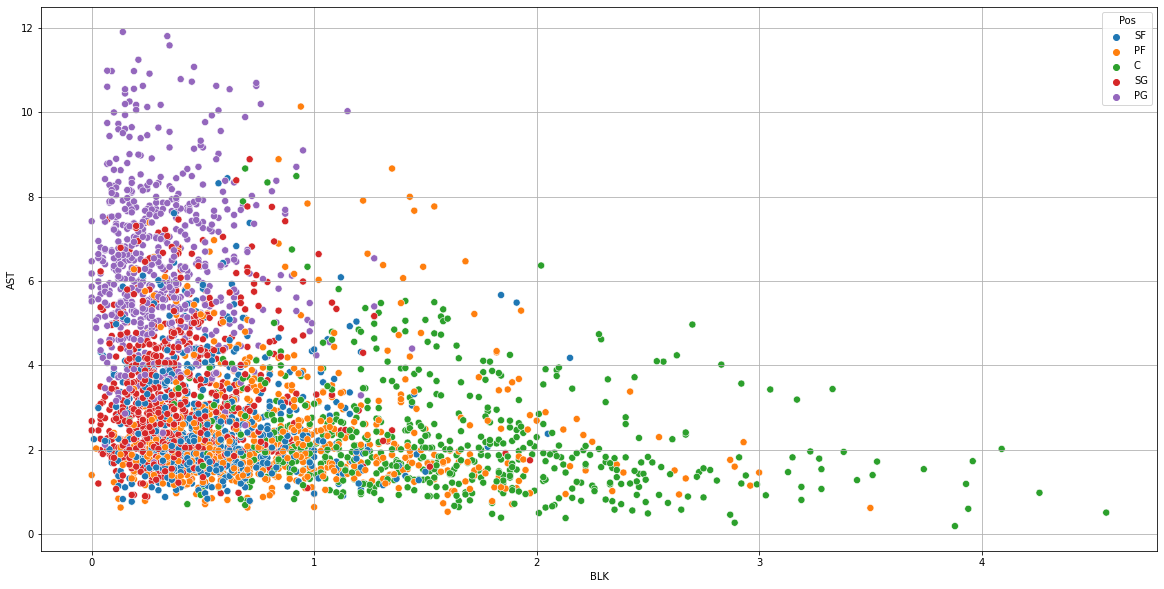

In [ ]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="BLK", y="AST", data=df, hue="Pos" , s=50)
plt.grid()

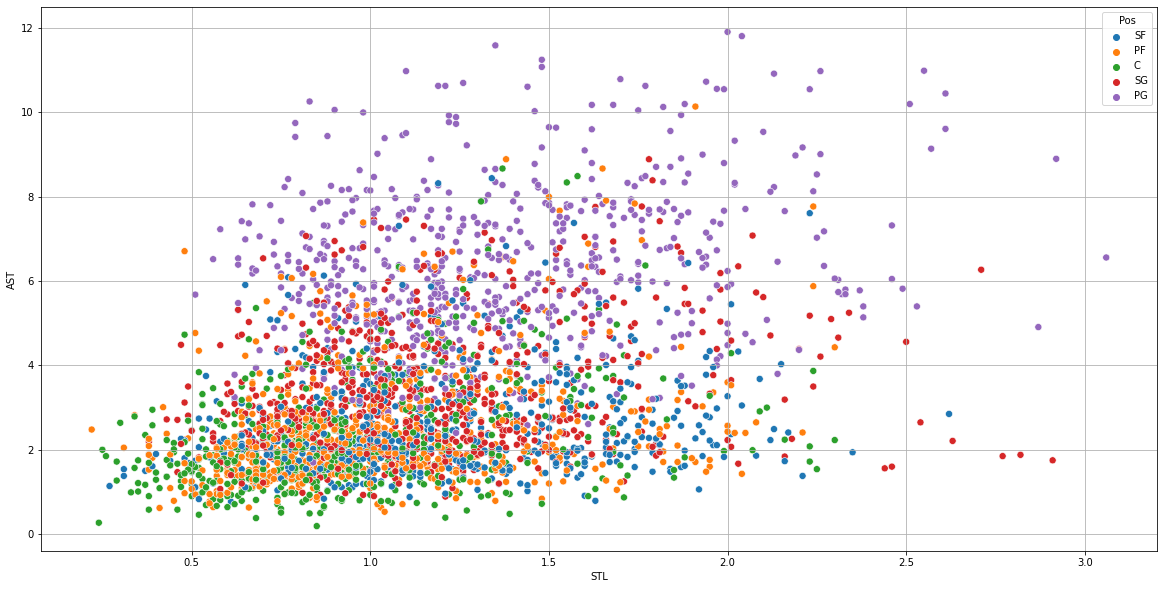

In [ ]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="STL", y="AST", data=df, hue="Pos" , s=50)
plt.grid()

# BOXPLOT DE ESTADÍSTICAS POR POSICIÓN

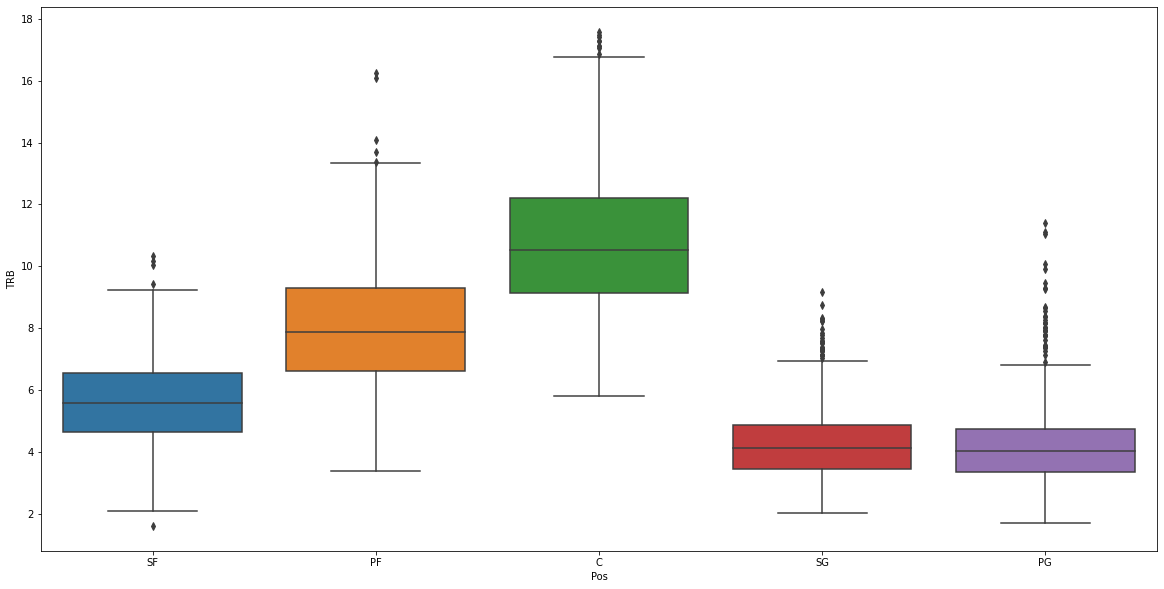

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(x="Pos", y="TRB", data=df)

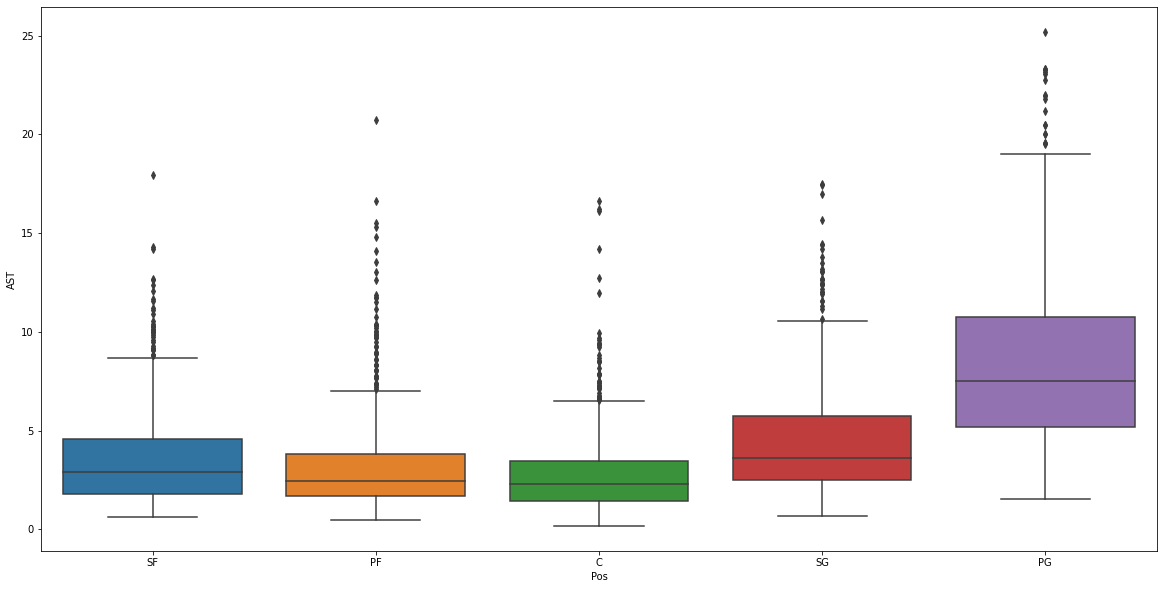

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(x="Pos", y="AST", data=df)

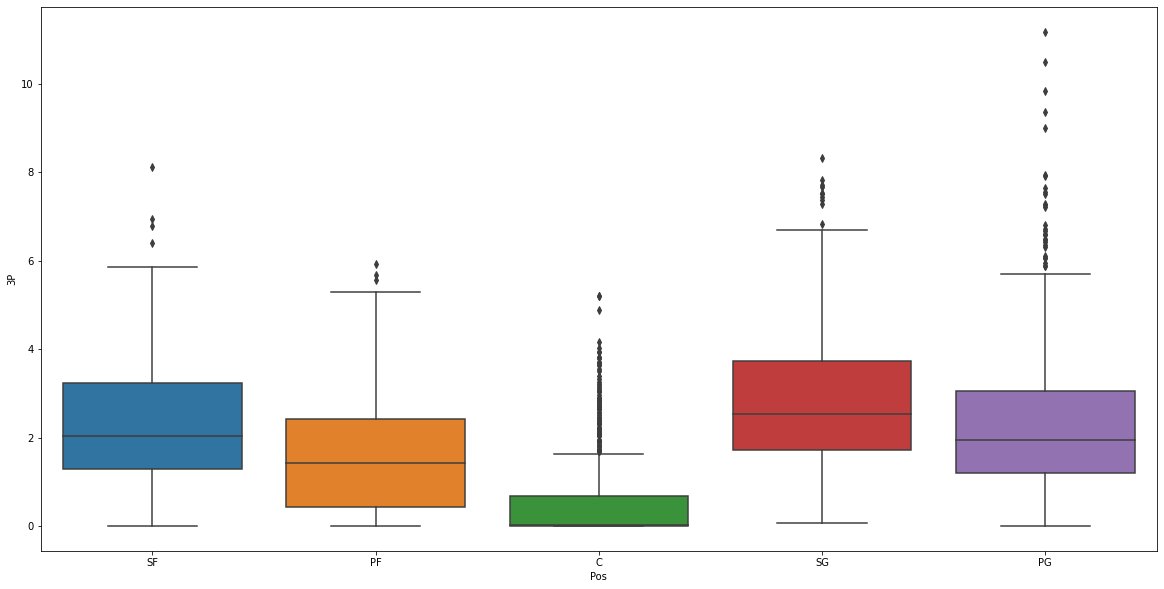

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(x="Pos", y="3P", data=df)

# PREPARACIÓN DE LOS MODELOS

In [ ]:
#DEFINICIÓN DE FEATURES Y VARIABLE OBJETIVO
df.fillna(0)
X = df.drop(columns = ['Pos','Player','Tm'])
y = df.loc[:, 'Pos']

#Debido al tipo de predicción que queremos realizar, la variable objetivo es la posición.

In [ ]:
df.isna().sum().sum()


0

In [ ]:
X

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
3,27,64,64,2307,6.20,14.12,0.44,1.12,3.75,0.30,...,0.86,0.45,3.28,3.73,3.21,0.62,0.17,2.15,2.14,16.49
8,27,74,74,2790,8.23,17.01,0.48,0.03,0.18,0.14,...,0.81,2.26,6.39,8.65,2.48,0.80,1.17,1.85,2.41,20.13
9,23,79,37,1669,4.44,9.79,0.45,0.00,0.02,0.00,...,0.72,3.43,5.09,8.52,1.57,0.52,1.19,1.19,3.88,9.81
10,37,79,0,2035,5.17,11.52,0.45,2.46,5.87,0.42,...,0.89,0.71,3.13,3.84,2.39,1.19,0.27,1.82,2.28,15.27
11,31,79,79,2109,4.85,10.89,0.44,0.05,0.41,0.12,...,0.72,2.07,4.13,6.20,1.67,2.03,0.75,1.60,3.60,12.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6534,26,68,67,2094,7.56,15.09,0.50,2.25,5.78,0.39,...,0.62,1.89,9.90,11.79,2.66,0.93,1.12,2.17,2.94,20.94
6536,29,77,8,1452,3.02,6.67,0.45,1.09,2.88,0.38,...,0.86,1.24,4.21,5.45,4.66,2.31,0.47,1.12,1.39,8.48
6542,33,52,1,845,6.01,11.59,0.52,0.72,2.04,0.35,...,0.47,3.41,5.45,8.86,4.43,2.30,0.77,2.22,3.45,13.72


In [ ]:
#Se le asigna un valor numérico a cada variable objetivo para mejorar la calidad de análisis de los algoritmos

position_dictionary = {
"PG": 1,
"SG": 2,
"SF": 3,
"PF": 4,
"C": 5}
y = y.map(position_dictionary).values.reshape(-1,1)

In [ ]:
y

array([[3],
       [4],
       [5],
       ...,
       [4],
       [1],
       [5]])

In [ ]:
#Armado de datasets de entrenamiento y de prueba.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

print('X_train:', X_train.shape) 
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train: (2433, 26)
X_test.shape: (811, 26)
y_train.shape: (2433, 1)
y_test.shape: (811, 1)


In [ ]:
X_train

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
2339,29,58,1,1275,5.17,12.51,0.41,0.56,2.34,0.24,...,0.83,0.54,3.87,4.40,4.01,1.21,0.23,2.15,2.17,14.60
4632,21,48,48,1444,6.33,13.59,0.47,0.62,2.17,0.29,...,0.83,1.94,5.39,7.33,2.17,0.92,0.20,1.32,2.62,16.18
4082,30,74,36,1606,6.81,11.99,0.57,0.16,0.69,0.23,...,0.72,3.14,3.27,6.41,2.00,0.25,1.75,2.15,2.78,15.78
5376,25,72,72,2488,10.59,18.71,0.57,1.33,3.43,0.39,...,0.87,2.97,8.32,11.29,8.67,1.37,0.69,3.21,2.78,27.46
1203,32,74,19,1744,4.03,9.08,0.44,1.51,4.33,0.35,...,0.81,0.64,3.57,4.21,1.71,1.16,0.10,1.24,3.06,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,31,39,36,1302,7.38,17.28,0.43,2.07,5.28,0.39,...,0.88,0.53,3.40,3.93,2.46,0.91,0.03,2.10,2.10,21.54
1051,23,82,82,2638,3.48,9.14,0.38,0.60,1.82,0.33,...,0.80,0.83,3.83,4.67,9.61,2.61,0.15,3.02,2.97,10.66
2226,23,82,0,1682,6.78,14.58,0.46,0.94,3.25,0.29,...,0.76,2.14,3.57,5.71,1.11,0.51,0.15,1.50,2.01,18.47


### **DECISION TREE**

In [ ]:
#Arbol de decisión
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_train_pred_tree = tree.predict(X_train) #Prediccion en Train
y_test_pred_tree = tree.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_tree)
print('% de aciertos sobre el set de evaluación:',test_accuracy_tree)

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.6177558569667078


In [ ]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz_tree = confusion_matrix(y_test, y_test_pred_tree)
print('Matriz de Confusión de datos de Test:')
print(matriz_tree)

Matriz de Confusión de datos de Test:
[[129  30   2   4   1]
 [ 26 108  34  15   2]
 [  6  47  61  34   1]
 [  5   7  26  89  41]
 [  1   1   3  24 114]]


Text(60.0, 0.5, 'Actual')

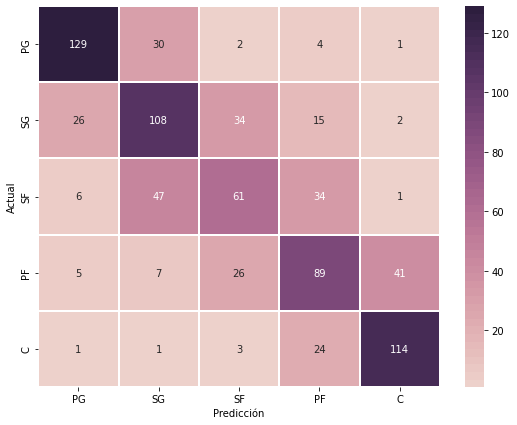

In [ ]:
#Genero el mapa de calor
f, ax = plt.subplots(figsize=(9, 7))
heat_map_tree = sns.heatmap(matriz_tree, 
                       annot=True, 
                       fmt="d", 
                       linewidths=1, 
                       ax=ax, 
                       cmap=sns.cubehelix_palette(50), 
                       xticklabels=position_dictionary.keys(), 
                       yticklabels=position_dictionary.keys())

heat_map_tree.set_xlabel("Predicción")
heat_map_tree.set_ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
tree_class = classification_report(y_test, y_test_pred_tree, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(tree_class)

              precision    recall  f1-score   support

          PG       0.77      0.78      0.77       166
          SG       0.56      0.58      0.57       185
          SF       0.48      0.41      0.44       149
          PF       0.54      0.53      0.53       168
           C       0.72      0.80      0.75       143

    accuracy                           0.62       811
   macro avg       0.61      0.62      0.62       811
weighted avg       0.61      0.62      0.61       811



### RANDOM FORESTS

In [ ]:
# Random Forests:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=0)

#pruebo algo que me dijo uno en clase
#rf = RandomForestClassifier(criterion='entropy', random_state=11, n_estimators=400,class_weight='balanced', max_features="log2")

rf = rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_rf)
print('% de aciertos sobre el set de evaluación:',test_accuracy_rf)

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.7324290998766955


In [ ]:
from sklearn.metrics import confusion_matrix
matriz_rf = confusion_matrix(y_test, y_test_pred_rf)
print('Matriz de Confusión de datos de Test:')
print(matriz_rf)

Matriz de Confusión de datos de Test:
[[153  11   1   1   0]
 [ 26 129  20  10   0]
 [  3  44  81  20   1]
 [  2   4  22 107  33]
 [  0   0   2  15 126]]


Text(60.0, 0.5, 'Actual')

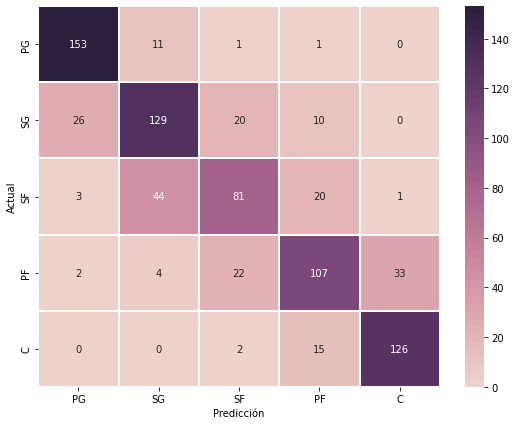

In [ ]:
#Genero el mapa de calor
f, ax = plt.subplots(figsize=(9, 7))
heat_map_rf = sns.heatmap(matriz_rf, 
                       annot=True, 
                       fmt="d", 
                       linewidths=1, 
                       ax=ax, 
                       cmap=sns.cubehelix_palette(50), 
                       xticklabels=position_dictionary.keys(), 
                       yticklabels=position_dictionary.keys())
heat_map_rf.set_xlabel("Predicción")
heat_map_rf.set_ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
rf_class = classification_report(y_test, y_test_pred_rf, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(rf_class)

              precision    recall  f1-score   support

          PG       0.83      0.92      0.87       166
          SG       0.69      0.70      0.69       185
          SF       0.64      0.54      0.59       149
          PF       0.70      0.64      0.67       168
           C       0.79      0.88      0.83       143

    accuracy                           0.73       811
   macro avg       0.73      0.74      0.73       811
weighted avg       0.73      0.73      0.73       811



### **SVM**

In [ ]:
# Support Vector Machines (SVMs):
from sklearn import svm
from sklearn.svm import SVC
svm1 = svm.SVC(kernel='linear', random_state=1)
svm1 = svm1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train_pred_svm = svm1.predict(X_train)
y_test_pred_svm = svm1.predict(X_test)

In [ ]:
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy_svm)
print('% de aciertos sobre el set de evaluación:',test_accuracy_svm)

% de aciertos sobre el set de entrenamiento: 0.7048910809699959
% de aciertos sobre el set de evaluación: 0.686806411837238


In [ ]:
from sklearn.metrics import confusion_matrix
matriz_svm = confusion_matrix(y_test, y_test_pred_svm)
print('Matriz de Confusión de datos de Test:')
print(matriz_svm)

Matriz de Confusión de datos de Test:
[[142  20   1   3   0]
 [ 20 127  35   3   0]
 [  2  44  80  22   1]
 [  3   5  31  93  36]
 [  0   0   1  27 115]]


Text(60.0, 0.5, 'Actual')

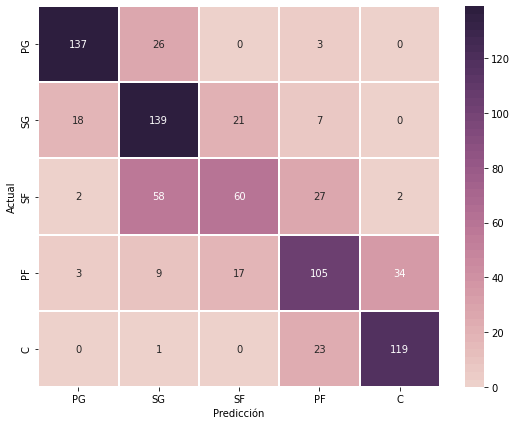

In [ ]:
#Genero el mapa de calor
f, ax = plt.subplots(figsize=(9, 7))
heat_map_svm = sns.heatmap(matriz_svm, 
                       annot=True, 
                       fmt="d", 
                       linewidths=1, 
                       ax=ax, 
                       cmap=sns.cubehelix_palette(50), 
                       xticklabels=position_dictionary.keys(), 
                       yticklabels=position_dictionary.keys())
heat_map_svm.set_xlabel("Predicción")
heat_map_svm.set_ylabel("Actual") 

In [ ]:
from sklearn.metrics import classification_report
svm_class = classification_report(y_test, y_test_pred_svm, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(svm_class)

              precision    recall  f1-score   support

          PG       0.85      0.86      0.85       166
          SG       0.65      0.69      0.67       185
          SF       0.54      0.54      0.54       149
          PF       0.63      0.55      0.59       168
           C       0.76      0.80      0.78       143

    accuracy                           0.69       811
   macro avg       0.68      0.69      0.69       811
weighted avg       0.68      0.69      0.69       811



De toda esta primera parte de modelos, hemos observado que el modelo con mayor accuracy es el Random Forests. 

# MODELOS DE BOOSTING

GRADIENT BOOSTING

In [ ]:
#elección de Learning Rate

from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gbt1_model = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=5, max_depth=3, random_state=0)
    
    
    gbt1_model.fit(X_train, y_train.ravel())
    print("Learning rate: ", learning_rate)
        
    print("Accuracy score (entrenamiento): {0:.3f}".format(
      gbt1_model.score(
        X_train,
        y_train.ravel())))

    print("Accuracy score (prueba): {0:.3f}".format(
      gbt1_model.score(
        X_test,
        y_test.ravel())))

Learning rate:  0.05
Accuracy score (entrenamiento): 0.713
Accuracy score (prueba): 0.661
Learning rate:  0.1
Accuracy score (entrenamiento): 0.737
Accuracy score (prueba): 0.679
Learning rate:  0.25
Accuracy score (entrenamiento): 0.804
Accuracy score (prueba): 0.683
Learning rate:  0.5
Accuracy score (entrenamiento): 0.872
Accuracy score (prueba): 0.694
Learning rate:  0.75
Accuracy score (entrenamiento): 0.898
Accuracy score (prueba): 0.673
Learning rate:  1
Accuracy score (entrenamiento): 0.912
Accuracy score (prueba): 0.674


Con esta prueba hemos conseguido obtener el valor óptimo entre Accuracy score de entrenamiento y prueba, siendo en este caso el de 0.75 ya que obtenemos un 89,3% en training y 63,1% en testing.

In [ ]:
# Gradient Boosted Trees (GBTs):
from sklearn.ensemble import GradientBoostingClassifier
gbt1 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=3, random_state=1)
gbt1 = gbt1_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train_pred_gbt = gbt1.predict(X_train)
y_test_pred_gbt = gbt1.predict(X_test)

In [ ]:
train_accuracy_gbt = accuracy_score(y_train, y_train_pred_gbt)
test_accuracy_gbt = accuracy_score(y_test, y_test_pred_gbt)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy_gbt)
print('% de aciertos sobre el set de evaluación:',test_accuracy_gbt)

% de aciertos sobre el set de entrenamiento: 0.9124537607891492
% de aciertos sobre el set de evaluación: 0.6744759556103576


In [ ]:
from sklearn.metrics import confusion_matrix
matriz_gbt = confusion_matrix(y_test, y_test_pred_gbt)
print('Matriz de Confusión de datos de Test:')
print(matriz_gbt)

Matriz de Confusión de datos de Test:
[[130  27   4   5   0]
 [ 21 131  27   5   1]
 [  7  39  81  20   2]
 [  6   7  33  90  32]
 [  0   0   4  24 115]]


Text(60.0, 0.5, 'Actual')

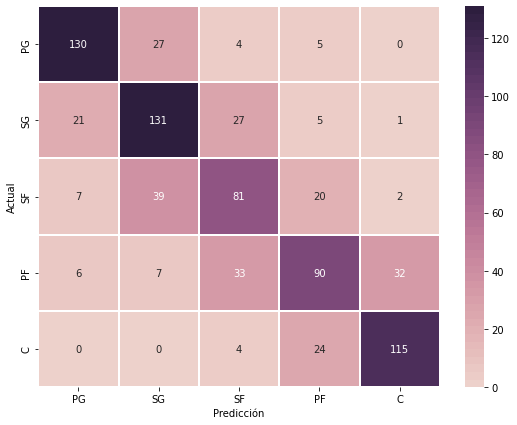

In [ ]:
#Genero el mapa de calor
f, ax = plt.subplots(figsize=(9, 7))
heat_map_gbt = sns.heatmap(matriz_gbt, 
                       annot=True, 
                       fmt="d", 
                       linewidths=1, 
                       ax=ax, 
                       cmap=sns.cubehelix_palette(50), 
                       xticklabels=position_dictionary.keys(), 
                       yticklabels=position_dictionary.keys())
heat_map_gbt.set_xlabel("Predicción")
heat_map_gbt.set_ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
gbt_class = classification_report(y_test, y_test_pred_gbt, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(gbt_class)

              precision    recall  f1-score   support

          PG       0.79      0.78      0.79       166
          SG       0.64      0.71      0.67       185
          SF       0.54      0.54      0.54       149
          PF       0.62      0.54      0.58       168
           C       0.77      0.80      0.78       143

    accuracy                           0.67       811
   macro avg       0.67      0.67      0.67       811
weighted avg       0.67      0.67      0.67       811



XGBOOST

In [ ]:
import xgboost as xgb

xgb1 = xgb.XGBClassifier(n_estimators=20, max_depth=3, random_state=1)
xgb1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(n_estimators=20, objective='multi:softprob', random_state=1)

In [ ]:
y_train_pred_xgb = xgb1.predict(X_train)
y_test_pred_xgb = xgb1.predict(X_test)

In [ ]:
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy_xgb)
print('% de aciertos sobre el set de evaluación:',test_accuracy_xgb)

% de aciertos sobre el set de entrenamiento: 0.7205096588573777
% de aciertos sobre el set de evaluación: 0.6535141800246609


In [ ]:
from sklearn.metrics import confusion_matrix
matriz_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print('Matriz de Confusión de datos de Test:')
print(matriz_xgb)

Matriz de Confusión de datos de Test:
[[149  13   1   3   0]
 [ 38 115  25   7   0]
 [  9  55  61  23   1]
 [  2   7  33  80  46]
 [  0   0   2  16 125]]


Text(60.0, 0.5, 'Actual')

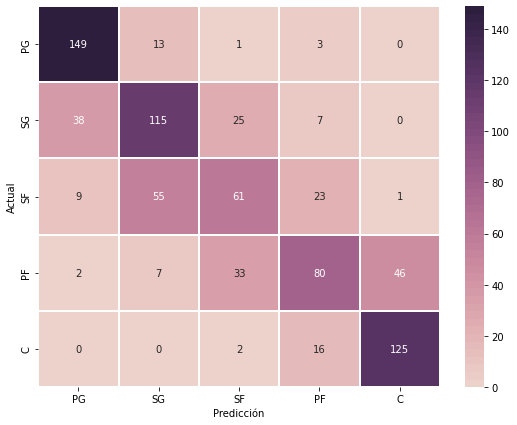

In [ ]:
#Genero el mapa de calor
f, ax = plt.subplots(figsize=(9, 7))
heat_map_xgb = sns.heatmap(matriz_xgb, 
                       annot=True, 
                       fmt="d", 
                       linewidths=1, 
                       ax=ax, 
                       cmap=sns.cubehelix_palette(50), 
                       xticklabels=position_dictionary.keys(), 
                       yticklabels=position_dictionary.keys())
heat_map_xgb.set_xlabel("Predicción")
heat_map_xgb.set_ylabel("Actual")

In [ ]:
xgb_class = classification_report(y_test, y_test_pred_xgb, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(xgb_class)

              precision    recall  f1-score   support

          PG       0.75      0.90      0.82       166
          SG       0.61      0.62      0.61       185
          SF       0.50      0.41      0.45       149
          PF       0.62      0.48      0.54       168
           C       0.73      0.87      0.79       143

    accuracy                           0.65       811
   macro avg       0.64      0.66      0.64       811
weighted avg       0.64      0.65      0.64       811



In [ ]:
rf_importancia = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)
print(rf_importancia)

      Importancia
AST      0.126216
TRB      0.111366
ORB      0.081795
DRB      0.072860
BLK      0.063163
TOV      0.043503
3PA      0.040774
STL      0.036446
3P       0.034370
PF       0.029784
2P%      0.026506
FG%      0.026196
FGA      0.024885
2PA      0.024327
FTA      0.024305
2P       0.023195
MP       0.023139
FT       0.022618
FG       0.022135
GS       0.021981
PTS      0.021679
3P%      0.021363
FT%      0.020960
Age      0.019609
eFG%     0.018951
G        0.017875


Tras analizar varios modelos, hemos optado por mejorar el random forest ya que es el que mejores índices de desempeño mostró en las pruebas hechas. 

# MEJORA DE MODELOS

### RANDOM FORESTS

In [ ]:
# Random Forests:
from sklearn.ensemble import RandomForestClassifier
rf_2 = RandomForestClassifier(n_estimators=1000, random_state=0)

rf_2 = rf_2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
y_train_pred_rf_2 = rf_2.predict(X_train)
y_test_pred_rf_2 = rf_2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy_rf_2 = accuracy_score(y_train, y_train_pred_rf_2)
test_accuracy_rf_2 = accuracy_score(y_test, y_test_pred_rf_2)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_rf_2)
print('% de aciertos sobre el set de evaluación:',test_accuracy_rf_2)

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.7336621454993835


In [ ]:
from sklearn.metrics import confusion_matrix
matriz_rf_2 = confusion_matrix(y_test, y_test_pred_rf_2)
print('Matriz de Confusión de datos de Test:')
print(matriz_rf_2)

Matriz de Confusión de datos de Test:
[[152  11   1   2   0]
 [ 24 125  27   9   0]
 [  3  42  84  19   1]
 [  2   4  26 105  31]
 [  0   0   2  12 129]]


Text(60.0, 0.5, 'Actual')

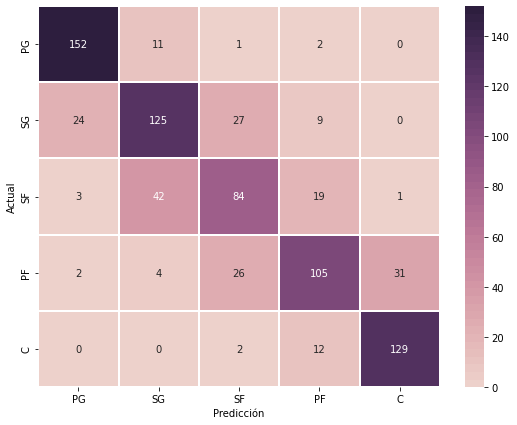

In [ ]:
#Genero el mapa de calor
f, ax = plt.subplots(figsize=(9, 7))
heat_map_rf = sns.heatmap(matriz_rf_2, 
                       annot=True, 
                       fmt="d", 
                       linewidths=1, 
                       ax=ax, 
                       cmap=sns.cubehelix_palette(50), 
                       xticklabels=position_dictionary.keys(), 
                       yticklabels=position_dictionary.keys())
heat_map_rf.set_xlabel("Predicción")
heat_map_rf.set_ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
rf_2_class = classification_report(y_test, y_test_pred_rf, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(rf_2_class)

              precision    recall  f1-score   support

          PG       0.84      0.91      0.87       166
          SG       0.68      0.68      0.68       185
          SF       0.60      0.56      0.58       149
          PF       0.71      0.62      0.66       168
           C       0.80      0.90      0.85       143

    accuracy                           0.73       811
   macro avg       0.73      0.73      0.73       811
weighted avg       0.73      0.73      0.73       811



### HYPERTUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

# Número de árboles en random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
#Criterio
criterion = ['gini','entropy']
# Número de features a considerar en cada división
max_features = ['auto', 'sqrt','log2']
# Máxima cantidad de niveles en árbol
max_depth = [2,4]
# Mínima cantidad de muestras para separar un nodo
min_samples_split = [2, 5, 10]
# Mínima cantidad de muestras para ramificar cada nodo
min_samples_leaf = [1, 2, 4]
# Método de seleción de muestras para entrenar cada árbol
bootstrap = [True, False]



In [ ]:
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_2_grid = GridSearchCV(estimator = rf_2, param_grid = random_grid, cv = 3, verbose = 2, n_jobs = -1) 

In [ ]:
rf_2_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [ ]:
rf_2_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 70}

In [ ]:
# Random Forests:
from sklearn.ensemble import RandomForestClassifier
rf_3 = RandomForestClassifier(bootstrap = True,
                              criterion = 'gini',
                              max_depth = 4,  
                              max_features = 'auto',
                              min_samples_leaf = 4,
                              min_samples_split = 2,
                              n_estimators = 70)

rf_3.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestClassifier(max_depth=4, min_samples_leaf=4, n_estimators=70)

In [ ]:
y_train_pred_rf_3 = rf_3.predict(X_train)
y_test_pred_rf_3 = rf_3.predict(X_test)

In [ ]:
train_accuracy_rf_3 = accuracy_score(y_train, y_train_pred_rf_3)
test_accuracy_rf_3 = accuracy_score(y_test, y_test_pred_rf_3)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy_rf_3)
print('% de aciertos sobre el set de evaluación:',test_accuracy_rf_3)

% de aciertos sobre el set de entrenamiento: 0.6781750924784217
% de aciertos sobre el set de evaluación: 0.6584463625154131


In [ ]:
from sklearn.metrics import classification_report
rf_3_class = classification_report(y_test, y_test_pred_rf, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(rf_3_class)

              precision    recall  f1-score   support

          PG       0.84      0.91      0.87       166
          SG       0.68      0.68      0.68       185
          SF       0.60      0.56      0.58       149
          PF       0.71      0.62      0.66       168
           C       0.80      0.90      0.85       143

    accuracy                           0.73       811
   macro avg       0.73      0.73      0.73       811
weighted avg       0.73      0.73      0.73       811



In [ ]:
mejora = test_accuracy_rf_3/test_accuracy_rf_2
print(mejora)

0.8974789915966387


Más allá de haber realizado un proceso de estudio de mejores hiperparámetros utilizando GridSearchCV, el Random Forests 2 sigue siendo el algoritmo que mejores resultados devuelve.

Al no ser un modelo que se defina de forma binaria el resultado de la variable objetivo, consideramos que un 73,36% de accuracy es un buen resultado con el que podemos trabajar. Al mismo tiempo, tal como buscábamos el modelo es más preciso en los extremos planteados (PG y C). 

# PRUEBA

La prueba a realizar consiste de la importación de 2 datasets. Uno de jugadores en los que su posición está muy marcada en función de su juego y otro en el que los jugadores no tienen una posición marcada ya que desempeñan roles que no son propios de su posición original.

Para los jugadores con posición más marcada hemos elegido a Steph Curry, Bradley Beal, Kawhi Leonard, Kevin Love y Joel Embiid.



In [ ]:
#Selección de jugadores con posición muy marcada
pg_curry = df.loc[((df['Player'] == 'Stephen Curry') & (df['Age']==26))]
sg_beal = df.loc[((df['Player'] == 'Bradley Beal') & (df['Age'] == 24))]
sf_kawhi = df.loc[((df['Player'] == 'Kawhi Leonard') & (df['Age'] == 25))]
pf_love = df.loc[((df['Player'] == 'Kevin Love') & (df['Age'] == 27))]
c_embiid = df.loc[((df['Player'] == 'Joel Embiid') & (df['Age'] == 24))]

#concatenar filas en un solo dataframe
df_posicion_si = pd.concat([pg_curry, sg_beal, sf_kawhi, pf_love, c_embiid], axis = 'rows', join = 'inner')


df_posicion_si = df_posicion_si.drop(columns = ['Player', 'Pos', 'Tm'])

df_posicion_si

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1320,26,80,80,2613,9.00,18.48,0.49,3.94,8.90,0.44,...,0.91,0.77,3.93,4.70,8.53,2.25,0.22,3.43,2.18,26.18
3049,24,82,82,2977,8.26,17.95,0.46,2.41,6.41,0.38,...,0.79,0.74,3.65,4.39,4.51,1.16,0.44,2.59,1.93,22.46
2732,25,74,74,2474,9.25,19.09,0.48,2.14,5.63,0.38,...,0.88,1.16,5.09,6.26,3.78,1.94,0.80,2.24,1.78,27.47
2167,27,77,77,2424,6.07,14.51,0.42,2.35,6.52,0.36,...,0.82,2.21,9.10,11.32,2.76,0.86,0.61,2.11,2.36,18.33
3873,24,64,64,2154,9.69,20.04,0.48,1.32,4.40,0.30,...,0.80,2.67,11.88,14.56,3.91,0.77,2.04,3.78,3.53,29.43


Para los jugadores sin posición marcada, caso que más nos interesa, optamos por varios en función de su posición originial y el resultado que buscamos obtener:
* Russell Westbrook: un PG que con 24 años registró una temporada siendo el mayor anotador y reboteador en su equipo, con un buen porcentaje de tiro de 3 y 2 puntos.
* Ben Simmons: un PG cuyo juego no solo incluye la defensa exterior, sino que por su tamaño físico aporta rebotes y bloqueos a su equipo.
* Luka Doncic: un PG que más allá de crear juego en su equipo, es uno de los mejores anotadores en el triple de la liga.
* James Harden: un SG que en sus temporadas jugando para Houston Rockets era armador del equipo, rol similar al de Doncic hoy por hoy en Dallas Mavericks.
* Lebron James: un SF que aporta en todos los lados del parqué, un jugador de toda la cancha. 
* Robert Covington: un SF con gran presencia defensiva, uno de los principales 3+D (como se conoce a los aleros defensivos) hoy por hoy en la NBA.
* Giannis Antetokounmpo: un jugador único para los de gran tamaño, con gran capacidad de anotar y defender.
* Karl-Anthony Towns: un C con gran capacidad de tiro de 3 y una defensa no tan sólida.
* Nikola Jokic: MVP de las últimas temporadas, un C con cualidades de PG, único en su especie. 

In [ ]:
#Selección de jugadores con posición no marcada

pg_westbrook = df.loc[((df['Player'] == 'Russell Westbrook') & (df['Age']==24))]
pg_simmons = df.loc[((df['Player'] == 'Ben Simmons') & (df['Age']==22))]
pg_luka = df.loc[((df['Player'] == 'Luka Doni') & (df['Age']==20))]
sg_harden = df.loc[((df['Player'] == 'James Harden') & (df['Age'] == 26))]
sf_lebron = df.loc[((df['Player'] == 'LeBron James') & (df['Age'] == 33))]
sf_roco = df.loc[((df['Player'] == 'Robert Covington') &(df['Age'] == 30))]
pf_giannis = df.loc[((df['Player'] == 'Draymond Green') & (df['Age'] == 26))]
c_kat = df.loc[((df['Player'] == 'Karl-Anthony Towns') & (df['Age'] == 26))]
c_jokic = df.loc[((df['Player'] == 'Nikola Joki') & (df['Age'] == 26))]

#concatenar filas en un solo dataframe
df_posicion_no = pd.concat([pg_westbrook, pg_luka, pg_simmons, sg_harden, sf_lebron, sf_roco, pf_giannis, c_kat, c_jokic], axis = 'rows', join = 'inner')

df_posicion_no = df_posicion_no.drop(columns = ['Player', 'Pos', 'Tm'])

df_posicion_no

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
552,24,82,82,2861,8.47,19.31,0.44,1.22,3.77,0.32,...,0.80,1.40,3.99,5.39,7.64,1.82,0.30,3.44,2.38,23.95
4558,20,61,61,2047,10.22,22.07,0.46,3.01,9.51,0.32,...,0.76,1.37,8.71,10.08,9.46,1.09,0.25,4.57,2.69,30.94
4272,22,79,79,2700,7.20,12.80,0.56,0.00,0.08,0.00,...,0.60,2.29,7.00,9.29,8.13,1.49,0.81,3.65,2.79,17.83
2042,26,82,82,3125,8.18,18.63,0.44,2.72,7.57,0.36,...,0.86,0.73,5.05,5.77,7.05,1.60,0.59,4.31,2.64,27.37
3313,33,82,82,3026,10.20,18.80,0.54,1.77,4.83,0.37,...,0.73,1.15,7.28,8.43,8.89,1.38,0.84,4.13,1.62,26.78
5176,30,70,70,2243,3.27,8.17,0.40,2.17,5.71,0.38,...,0.81,0.98,6.50,7.48,1.88,1.62,1.35,1.03,3.13,9.52
2617,26,76,76,2471,3.96,9.47,0.42,1.18,3.83,0.31,...,0.71,1.43,7.30,8.73,7.77,2.24,1.54,2.68,3.16,11.31
6473,26,74,74,2476,9.33,17.65,0.53,2.18,5.32,0.41,...,0.82,2.82,7.75,10.57,3.91,1.05,1.21,3.29,3.88,26.43
6128,26,74,74,2476,11.11,19.06,0.58,1.41,4.19,0.34,...,0.81,3.00,11.82,14.82,8.49,1.58,0.92,4.09,2.78,29.14


In [ ]:
#Predicción dataframe con posiciones marcadas
prediccion_posicion_1 = rf_2.predict(df_posicion_si)
print(prediccion_posicion_1)

[1 2 3 4 5]


In [ ]:
#Predicción dataframe con posiciones no marcadas
prediccion_posicion_2 = rf_2.predict(df_posicion_no)
print(prediccion_posicion_2)

[1 1 1 2 4 4 4 5 5]


Los resultados obtenidos son más que favorables en nuestro análisis. 

Aquellos con posición marcada predicen de gran manera su posición original.

Para los jugadores sin posición marcada obtuvimos resultados interesantes para los SF:

* Si bien Lebron es un gran tirador, su presencia en la parte defensiva lo ha hecho jugar de PF en quintetos de small ball cuando se vio en necesidad el equipo, como en la última temporada de los Lakers. Podíamos esperar que devolviera las posiciones de SG y de PF, siendo la segunda la que entregó el algoritmo.
* RoCo al ser un 3+D guarda condiciones defensivas férreas, por lo que esperábamos que el algoritmo devolviera PF. 

Al mismo tiempo logramos entender la forma de ponderar las variables del algoritmo. Si un jugador tiene características muy marcadas en las posiciones más extremas como habíamos detallado (PG y C) lo reconocerá como tal, más allá de desempeñarse en otro tipo de roles. 